In [4]:
import pandas as pd
import requests

#### Fetch 1000 restaurants from Yelp API <br> Yelp API has a limitation that only allows exporting 1000 places <br>https://docs.developer.yelp.com/reference/v3_business_search

In [6]:
# Export to yelp_places.xlsx
headers = {
    "accept": "application/json",
    "Authorization": "Bearer "
}

all_data = [] 

offset = 0
limit = 50

while offset < 1000:
    url = f"https://api.yelp.com/v3/businesses/search?location=Louisville%2C%20KY&term=restaurant&sort_by=best_match&limit={limit}&offset={offset}"
    print(url)

    response = requests.get(url, headers=headers)
    data = response.json()
    
    # Append the 'businesses' data to the list
    all_data.extend(data['businesses'])

    offset += limit

# Convert the list of dictionaries to a DataFrame
df = pd.json_normalize(all_data)  
df.to_excel("yelp_places.xlsx", index=False)

https://api.yelp.com/v3/businesses/search?location=Louisville%2C%20KY&term=restaurant&sort_by=best_match&limit=50&offset=0
https://api.yelp.com/v3/businesses/search?location=Louisville%2C%20KY&term=restaurant&sort_by=best_match&limit=50&offset=50
https://api.yelp.com/v3/businesses/search?location=Louisville%2C%20KY&term=restaurant&sort_by=best_match&limit=50&offset=100
https://api.yelp.com/v3/businesses/search?location=Louisville%2C%20KY&term=restaurant&sort_by=best_match&limit=50&offset=150
https://api.yelp.com/v3/businesses/search?location=Louisville%2C%20KY&term=restaurant&sort_by=best_match&limit=50&offset=200
https://api.yelp.com/v3/businesses/search?location=Louisville%2C%20KY&term=restaurant&sort_by=best_match&limit=50&offset=250
https://api.yelp.com/v3/businesses/search?location=Louisville%2C%20KY&term=restaurant&sort_by=best_match&limit=50&offset=300
https://api.yelp.com/v3/businesses/search?location=Louisville%2C%20KY&term=restaurant&sort_by=best_match&limit=50&offset=350
htt

#### Read yelp_places.xlsx to dataframe

In [7]:
yelp_df = pd.read_excel("yelp_places.xlsx")
yelp_df = yelp_df.applymap(lambda s: s.lower() if type(s) == str else s)
yelp_df

,id,alias,name,image_url,is_closed,url,review_count,categories,rating,transactions,...,coordinates.latitude,coordinates.longitude,location.address1,location.address2,location.address3,location.city,location.zip_code,location.country,location.state,location.display_address
0,wi0imyhbxiy6am6gc7cfwg,hammerheads-louisville,hammerheads,https://s3-media1.fl.yelpcdn.com/bphoto/9ef0ls...,False,https://www.yelp.com/biz/hammerheads-louisvill...,1325,"[{'alias': 'southern', 'title': 'southern'}, {...",4.5,['delivery'],...,38.238580,-85.736550,921 swan st,NaN,NaN,louisville,40204.0,us,ky,"['921 swan st', 'louisville, ky 40204']"
1,21nt4st1rxsutjsu9s5u4w,the-eagle-louisville-2,the eagle,https://s3-media4.fl.yelpcdn.com/bphoto/jbkz7n...,False,https://www.yelp.com/biz/the-eagle-louisville-...,1523,"[{'alias': 'southern', 'title': 'southern'}, {...",4.5,['delivery'],...,38.234753,-85.714737,1314 bardstown rd,NaN,NaN,louisville,40204.0,us,ky,"['1314 bardstown rd', 'louisville, ky 40204']"
2,fvljyhayxbprulxr5tiu-a,olivers-chop-house-and-bourbon-bar-louisville-2,oliver's chop house & bourbon bar,https://s3-media1.fl.yelpcdn.com/bphoto/vf5q5z...,False,https://www.yelp.com/biz/olivers-chop-house-an...,3,"[{'alias': 'steak', 'title': 'steakhouses'}, {...",4.5,[],...,38.185789,-85.709497,4520 poplar level rd,NaN,derby city gaming hotel,louisville,40213.0,us,ky,"['4520 poplar level rd', 'derby city gaming ho..."
3,odtehpnf_efyedaos1tkbg,north-of-bourbon-louisville,north of bourbon,https://s3-media2.fl.yelpcdn.com/bphoto/vcbfow...,False,https://www.yelp.com/biz/north-of-bourbon-loui...,135,"[{'alias': 'diners', 'title': 'diners'}, {'ali...",4.5,[],...,38.229700,-85.738690,935 goss ave,NaN,NaN,louisville,40217.0,us,ky,"['935 goss ave', 'louisville, ky 40217']"
4,ip1u6lnesn-coxw9h0j0da,doc-crows-southern-smokehouse-and-raw-bar-loui...,doc crow's,https://s3-media2.fl.yelpcdn.com/bphoto/cucwgg...,False,https://www.yelp.com/biz/doc-crows-southern-sm...,2032,"[{'alias': 'southern', 'title': 'southern'}, {...",4.0,"['delivery', 'pickup']",...,38.256488,-85.752782,127 w main st,NaN,NaN,louisville,40202.0,us,ky,"['127 w main st', 'louisville, ky 40202']"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,dvlhobcprro_srrfrwxblw,bobbie-s-son-catering-louisville,bobbie’s son catering,https://s3-media4.fl.yelpcdn.com/bphoto/j5ju8u...,False,https://www.yelp.com/biz/bobbie-s-son-catering...,0,"[{'alias': 'seafood', 'title': 'seafood'}, {'a...",0.0,[],...,38.235098,-85.759659,317 w oak st,NaN,NaN,louisville,40203.0,us,ky,"['317 w oak st', 'louisville, ky 40203']"
996,4i1csfxyzvbxis8rnkl_ba,chilis-to-go-louisville,chili's to go,https://s3-media3.fl.yelpcdn.com/bphoto/iajwxm...,False,https://www.yelp.com/biz/chilis-to-go-louisvil...,19,"[{'alias': 'bars', 'title': 'bars'}, {'alias':...",2.0,[],...,38.185830,-85.741725,600 terminal dr,NaN,"louisville international airport, concourse a,...",louisville,40209.0,us,ky,"['600 terminal dr', 'louisville international ..."
997,6api1x1m1ksbwk_zgm-n4w,get-in-your-belly-deli-louisville,get in your belly deli,https://s3-media1.fl.yelpcdn.com/bphoto/6cb30i...,False,https://www.yelp.com/biz/get-in-your-belly-del...,8,"[{'alias': 'foodtrucks', 'title': 'food trucks...",4.0,[],...,38.251180,-85.752710,NaN,NaN,NaN,louisville,40202.0,us,ky,"['louisville, ky 40202']"
998,sc6bmrahs1ga9nlbwnkh5g,st-margaret-mary-fish-fry-lyndon,st. margaret mary fish fry,https://s3-media2.fl.yelpcdn.com/bphoto/o-odrp...,False,https://www.yelp.com/biz/st-margaret-mary-fish...,3,"[{'alias': 'fishnchips', 'title': 'fish & chip...",4.5,[],...,38.250118,-85.608808,7813 shelbyville rd,NaN,NaN,lyndon,40222.0,us,ky,"['7813 shelbyville rd', 'lyndon, ky 40222']"


#### Read louisville_inspection.xlsx file to dataframe

In [8]:
lou_inspection = pd.read_excel("louisville_inspection.xlsx")
lou_inspection.columns = lou_inspection.columns.str.lower()
lou_inspection = lou_inspection.applymap(lambda s: s.lower() if type(s) == str else s)
lou_inspection

,establishmentid,inspectionid,ins_typedesc,establishmentname,placename,address,address2,city,state,zip,typedescription,inspectiondate,score,grade,namesearch,intersection,objectid
0,29956,1684470,regular,cvs #6211,NaN,3721 lexington rd,NaN,louisville,ky,40207,pre-packaged retail,2022/07/06 00:00:00,100,NaN,cvs #6211,NaN,1
1,29967,1699737,regular,neighborhood food mart,NaN,542 lampton st,NaN,louisville,ky,40203,supermarket with processing,2022/09/07 00:00:00,97,NaN,neighborhood food mart,NaN,2
2,29979,1698679,regular,circle k #4700075,NaN,1630 arthur st,NaN,louisville,ky,40208,"retail-food 10,000 sq ft or less",2022/09/01 00:00:00,97,a,circle k #4700075,NaN,3
3,29979,1698680,regular,circle k #4700075,NaN,1630 arthur st,NaN,louisville,ky,40208,"retail-food 10,000 sq ft or less",2022/09/01 00:00:00,98,NaN,circle k #4700075,NaN,4
4,29979,1731827,regular,circle k #4700075,NaN,1630 arthur st,NaN,louisville,ky,40208,"retail-food 10,000 sq ft or less",2023/01/27 00:00:00,95,a,circle k #4700075,NaN,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11225,118688,1758428,other,gringos food trucks,NaN,NaN,NaN,louisville,ky,40202,self-contained mobile food units,2023/05/25 00:00:00,100,NaN,gringos food trucks,NaN,11226
11226,118697,1758467,other,frickled pickle express,NaN,NaN,NaN,louisville,ky,40202,self-contained mobile food units,2023/05/25 00:00:00,98,NaN,frickled pickle express,NaN,11227
11227,118710,1758790,other,tienda latinoamericano #3,NaN,8040 new lagrange rd,NaN,louisville,ky,40222,"retail-food 10,000 sq ft or less",2023/05/04 00:00:00,98,NaN,tienda latinoamericano #3,NaN,11228
11228,118710,1758791,other,tienda latinoamericano #3,NaN,8040 new lagrange rd,NaN,louisville,ky,40222,"retail-food 10,000 sq ft or less",2023/05/04 00:00:00,96,NaN,tienda latinoamericano #3,NaN,11229


#### Merge dataframes to make a single dataframe

In [9]:
merged_df = pd.merge(lou_inspection,yelp_df, left_on=['establishmentname','address'], right_on=['name','location.address1'])
merged_df.drop(columns=['address2','city','state','namesearch','intersection','objectid','id','alias',\
                     'name', 'is_closed','image_url','url','categories','transactions','phone','display_phone','distance',\
                     'coordinates.latitude','coordinates.longitude','location.address2','location.address3',\
                     'location.city','location.zip_code','location.country','location.state','location.display_address','location.address1'], inplace=True)
merged_df.to_excel("merged_output.xlsx", index=False)

In [ ]:
# merged_df

##### ONLY return records where score != 0

In [10]:
mask = merged_df['score'] != 0
merged_df_masked = merged_df[mask]
merged_df_masked.to_excel("merged_output_masked.xlsx", index=False)

#### Output data into queryable table (SQLite)

In [ ]:
# come back if I have time

##### Visualizations

In [11]:
import seaborn as sns

<Axes: xlabel='score', ylabel='price_num'>

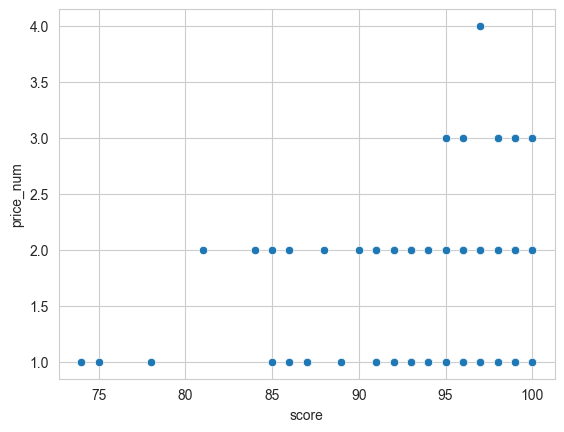

In [47]:
sns.set_style('whitegrid')
price_mapping = {'$': 1, '$$': 2, '$$$': 3, '$$$$': 4}
merged_df_masked.loc[:,'price_num'] = merged_df_masked['price'].map(price_mapping).astype(float)


sns.scatterplot(x='score', y='price_num', 
                # size='rating', 
                # size_order=[1, 2, 3, 4], 
                # sizes=[100,200,300,400,500,600],
                data=merged_df_masked)